In [1]:
import numpy as np
from numpy import pi as π
from numpy.random import randn
from numpy.linalg import norm

from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

np.random.seed(42)

In [2]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0, 0)
x = randn(n1 + n2)
y = 0.5*randn(n1 + n2)

# Random ellipse 2 centered at (1, -2)
x2 = randn(n1 + n2) + 1
y2 = 0.2*randn(n1 + n2) - 2

# Rotate ellipse 2 by angle θ
θ = π/4
A = np.array([
    [np.cos(θ), -np.sin(θ)],
    [np.sin(θ),  np.cos(θ)]
])

x3 = A[0, 0]*x2 + A[0, 1]*y2
y3 = A[1, 0]*x2 + A[1, 1]*y2

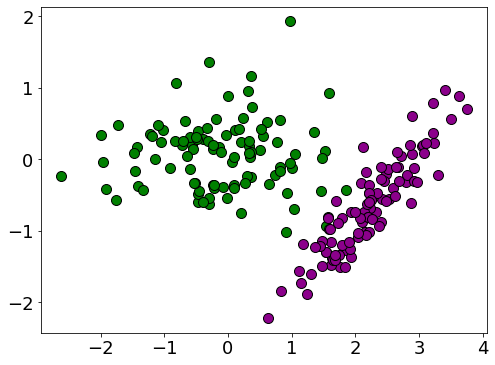

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(x[:n1], y[:n1], 'o', color='green', markeredgecolor='black', markersize=10)
plt.plot(x3[:n1], y3[:n1], 'o', color='darkmagenta', markeredgecolor='black', markersize=10);

In [4]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1], y3[:n1]))
X2 = np.column_stack((x[:n1], y[:n1]))

Y = np.vstack([
    X1,
    X2
])
Z = np.column_stack([np.ones(n1), np.full(n1, 2)])

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:], y3[n1:]))
x2test = np.column_stack((x[n1:], y[n1:]))

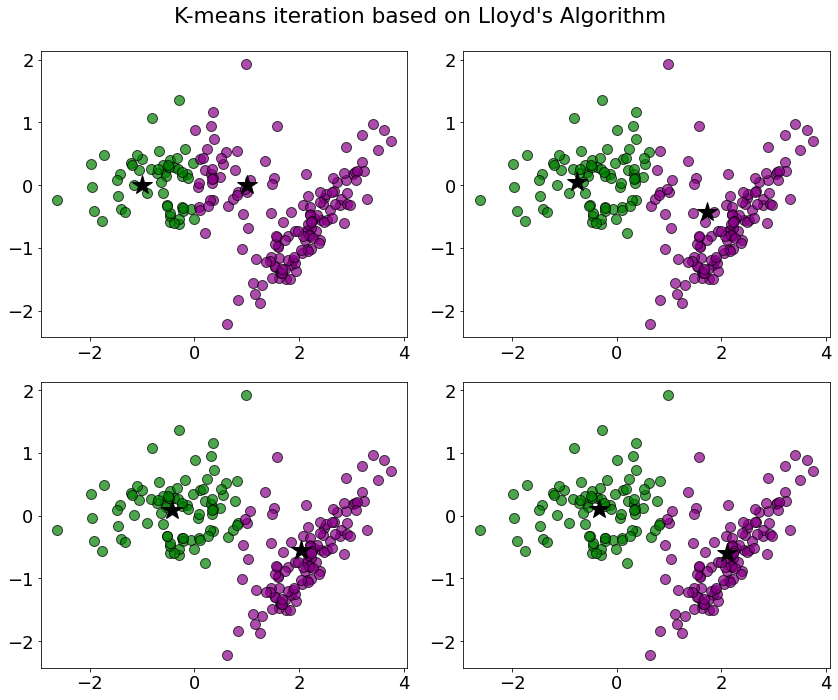

In [5]:
# Figure 5.10

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Initial guess
g1 = np.array([-1, 0])
g2 = np.array([1, 0])

for ax in axs.flat:
    class1, class2 = [], []
    for Yj in Y:
        d1, d2 = norm(g1 - Yj), norm(g2 - Yj)
        if d1 < d2:
            class1.append(Yj)
        else:
            class2.append(Yj)
    class1, class2 = np.array(class1), np.array(class2)
    
    ax.plot(class1[:, 0], class1[:, 1], 'o', color='green', markersize=10, markeredgecolor='black', alpha=0.7)
    ax.plot(class2[:, 0], class2[:, 1], 'o', color='darkmagenta', markersize=10, markeredgecolor='black', alpha=0.7)
    ax.plot(*g1, 'k*', ms=20)
    ax.plot(*g2, 'k*', ms=20)
    
    g1 = np.array([np.mean(class1[:, 0]), np.mean(class1[:, 1])])
    g2 = np.array([np.mean(class2[:, 0]), np.mean(class2[:, 1])])
fig.suptitle("K-means iteration based on Lloyd's Algorithm")
plt.tight_layout();

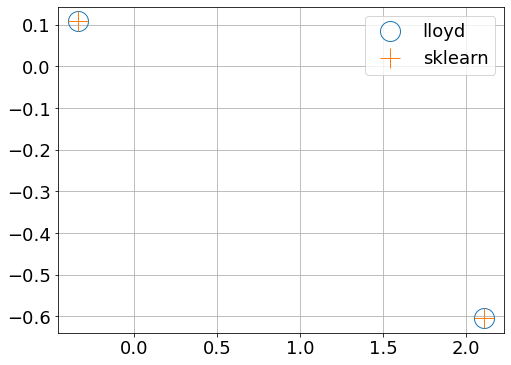

In [6]:
# Compare with kmeans from scikit learn
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)
c = kmeans.cluster_centers_
ind = kmeans.labels_

fig, ax = plt.subplots(figsize=(8, 6))

# Result from previous section
ax.plot([g1[0], g2[0]], [g1[1], g2[1]], 'o', markerfacecolor='none', markersize=20, label='lloyd')
# Result from sklearn kmeans
ax.plot([c[0, 0], c[1, 0]], [c[0, 1], c[1, 1]], '+', markersize=20, label='sklearn')

ax.grid(True)
ax.legend();

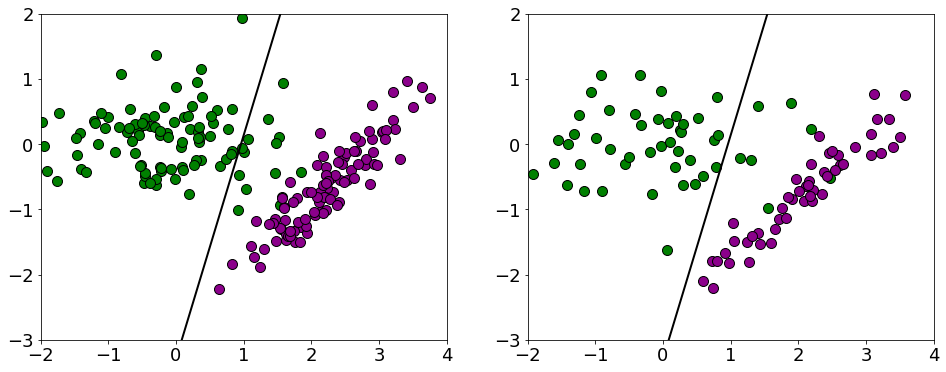

In [7]:
# Figure 5.11

midx = (c[0, 0] + c[1, 0])/2
midy = (c[0, 1] + c[1, 1])/2
slope = (c[1, 1] - c[0, 1]) / (c[1, 0] - c[0, 0]) # rise/run
b = midy + (1/slope) * midx
xsep = np.arange(-1, 2, 0.1)
ysep = -(1/slope) * xsep + b

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(x[:n1], y[:n1], 'o', color='green', markeredgecolor='black', markersize=10)
axs[0].plot(x3[:n1], y3[:n1], 'o', color='darkmagenta', markeredgecolor='black', markersize=10)
axs[0].plot(xsep, ysep, color='black', linewidth=2)
axs[0].set_xlim(-2, 4)
axs[0].set_ylim(-3, 2)

# Error on test data
axs[1].plot(x[n1:], y[n1:], 'o', color='green', markeredgecolor='black', markersize=10)
axs[1].plot(x3[n1:], y3[n1:], 'o', color='darkmagenta', markeredgecolor='black', markersize=10)
axs[1].plot(xsep, ysep, color='black', linewidth=2)
axs[1].set_xlim(-2, 4)
axs[1].set_ylim(-3, 2);